In [4]:
import pandas as pd
Prices = pd.read_csv("data/sample_prices.csv")
Prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [5]:
returns = Prices.pct_change()
returns


,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [12]:
returns=returns.dropna()
returns


,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [6]:
returns.std() #calculating variation, this is std of sample population which is n-1

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [6]:
deviations = returns-returns.mean()
squared_deviation = deviations**2
variance = squared_deviation.mean()
import numpy as np
volatility = np.sqrt(variance) # total population standard deviation which is n, hence the diff in the values
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [13]:
returns.shape  # give the shape of the data frame which in this case has 12 rows and 2 columns

(12, 2)

### To get same values of std we have to do so...

In [15]:
num_of_obs = returns.shape[0] # this is the starting or previous value
variance = squared_deviation.sum()/ (num_of_obs -1)
volatility = variance**0.5 # another way to do square root
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [16]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### returns for a year or calculated anually

In [17]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [18]:
returns.std()*12**0.5 # another way to calculate anual returns

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### Reading data set given in this course

In [7]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0,index_col=0, parse_dates = True,
                      na_values = -99.99) 
returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


### We want to look at low and high 10 values

In [9]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [10]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [12]:
returns.columns =['Small cap','High cap']
returns.head()

,Small cap,High cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

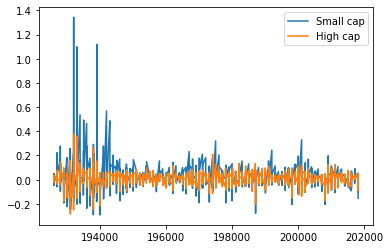

In [14]:
returns.plot.line()

In [17]:
anualized_vol = returns.std()*np.sqrt(12)  # anual returns
anualized_vol 

Small cap    0.368193
High cap     0.186716
dtype: float64

### Returns per month

In [20]:
no_months = returns.shape[0] # tuple of rows which is in our data set is 1110 rows, which are number of months as each row has data of each month
returns_per_month = (returns+1).prod()**(1/no_months)-1 # return per month
returns_per_month 

Small cap    0.012986
High cap     0.007423
dtype: float64

### Anualized returns

In [21]:
anualized_return = (returns_per_month+1)**12-1
anualized_return

Small cap    0.167463
High cap     0.092810
dtype: float64

### 2nd type of getting anual returns

In [22]:
anualized_return =(returns+1).prod()**(12/no_months)-1
anualized_return

Small cap    0.167463
High cap     0.092810
dtype: float64

In [23]:
anualized_return/anualized_vol

Small cap    0.454825
High cap     0.497063
dtype: float64

### Computing sharpe ratio is the return we get with risk free rate

In [24]:
risk_free_rate = 0.03 # just giving a flat rate for the example 
excess_return = anualized_return - risk_free_rate
sharpe_ratio = excess_return/anualized_vol
sharpe_ratio

Small cap    0.373346
High cap     0.336392
dtype: float64